# Impacto de los Proyectos de Ciencia, Tecnología e Innovación en el Desarrollo Regional: Un Análisis Cuantitativo por Áreas Temáticas y Financiamiento


In [171]:
!git clone https://github.com/Diazbj/ProyectoAnalisisDeDatos.git
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

fatal: destination path 'ProyectoAnalisisDeDatos' already exists and is not an empty directory.


In [163]:
ruta='/content/ProyectoAnalisisDeDatos/DataSetLimpio.csv'

In [164]:
df=pd.read_csv(ruta)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PROYECTO_ID              2468 non-null   int64 
 1   CONVOCATORIA_ID          2468 non-null   int64 
 2   ANO_CONVOCATORIA         2468 non-null   int64 
 3   DESC_CONVOCATORIA        2468 non-null   object
 4   CODIGO_PROYECTO          2468 non-null   int64 
 5   TITULO_PROYECTO          2468 non-null   object
 6   FECHA_REGISTRO           2468 non-null   object
 7   FECHA_APROBACION         2468 non-null   object
 8   ENTIDAD_EJECUTA          2468 non-null   object
 9   TIPO_FINANCIACION        2468 non-null   object
 10  DESC_FINANCIACION        2468 non-null   object
 11  COD_PROG_CTI             2468 non-null   int64 
 12  NME_PROG_CTI             2468 non-null   object
 13  COD_AREA_TEMATICA        2468 non-null   object
 14  AREA_TEMATICA            2468 non-null  

#**6. Analisis Avanzado**

In [165]:
df.head()

,PROYECTO_ID,CONVOCATORIA_ID,ANO_CONVOCATORIA,DESC_CONVOCATORIA,CODIGO_PROYECTO,TITULO_PROYECTO,FECHA_REGISTRO,FECHA_APROBACION,ENTIDAD_EJECUTA,TIPO_FINANCIACION,...,NME_DEPTO_ENTIDAD,COD_DANE_CIUDAD_PRY,NME_CIUDAD_PRY,COD_DANE_DEPTO_PRY,NME_DEPTO_PRY,TPO_PROYECTO,NME_TIPO_PROYECTO,MONTO_FINANCIADO_AP,MONTO_CONTRAPARTIDA_AP,MONTO_TOTAL_AP
0,58287,11340,2017,777-2017 CONVOCATORIA PARA PROYECTOS DE CIENCI...,110677758287,FACTORES DE RIESGO Y EXPLORACION GENETICA EN S...,2017-05-31,2017-10-10,UNIVERSIDAD DEL VALLE,RC,...,VALLE DEL CAUCA,76001,CALI,76,VALLE DEL CAUCA,P,Proyecto,334890746,201067707,535958453
1,57610,11340,2017,777-2017 CONVOCATORIA PARA PROYECTOS DE CIENCI...,110677757610,Hormonas tiroideas en la gestante obesa y su u...,2017-05-16,2017-10-10,UNIVERSIDAD DEL VALLE,RC,...,VALLE DEL CAUCA,76001,CALI,76,VALLE DEL CAUCA,P,Proyecto,299999627,282575814,582575441
2,57782,11340,2017,777-2017 CONVOCATORIA PARA PROYECTOS DE CIENCI...,110677757782,DESARROLLO DE UNA PLATAFORMA DIGITAL DE MONITO...,2017-05-21,2017-10-10,UNIVERSIDAD DEL VALLE,RC,...,VALLE DEL CAUCA,76001,CALI,76,VALLE DEL CAUCA,P,Proyecto,198752714,117660000,316412714
3,58446,11340,2017,777-2017 CONVOCATORIA PARA PROYECTOS DE CIENCI...,656677758446,Descripcion de las reacciones de rechazo media...,2017-06-03,2017-10-10,FUNDACION CARDIOVASCULAR DE COLOMBIA,RC,...,SANTANDER,68547,PIEDECUESTA,68,SANTANDER,P,Proyecto,400000000,491773244,891773244
4,57697,11340,2017,777-2017 CONVOCATORIA PARA PROYECTOS DE CIENCI...,651777757697,Terapia celular mas efectiva para la isquemia ...,2017-05-18,2017-10-10,FUNDACION OFTALMOLOGICA DE SANTANDER,RC,...,SANTANDER,68276,FLORIDABLANCA,68,SANTANDER,P,Proyecto,376086705,368000349,744087054


##**6.1 Analisis Temporal**

In [167]:
df2=df
df2['FECHA_APROBACION'] = pd.to_datetime(df2['FECHA_APROBACION'])
df2['ANIO_APROBACION'] = df2['FECHA_APROBACION'].dt.year

new_df = df2[['ANIO_APROBACION', 'TITULO_PROYECTO']]

new_df.head()

,ANIO_APROBACION,TITULO_PROYECTO
0,2017,FACTORES DE RIESGO Y EXPLORACION GENETICA EN S...
1,2017,Hormonas tiroideas en la gestante obesa y su u...
2,2017,DESARROLLO DE UNA PLATAFORMA DIGITAL DE MONITO...
3,2017,Descripcion de las reacciones de rechazo media...
4,2017,Terapia celular mas efectiva para la isquemia ...


In [168]:
df = df.drop('ANIO_APROBACION', axis=1)

merged_df = pd.merge(df, new_df, on='TITULO_PROYECTO', how='left')

# Display the first few rows of the merged dataframe
merged_df.head()

,PROYECTO_ID,CONVOCATORIA_ID,ANO_CONVOCATORIA,DESC_CONVOCATORIA,CODIGO_PROYECTO,TITULO_PROYECTO,FECHA_REGISTRO,FECHA_APROBACION,ENTIDAD_EJECUTA,TIPO_FINANCIACION,...,COD_DANE_CIUDAD_PRY,NME_CIUDAD_PRY,COD_DANE_DEPTO_PRY,NME_DEPTO_PRY,TPO_PROYECTO,NME_TIPO_PROYECTO,MONTO_FINANCIADO_AP,MONTO_CONTRAPARTIDA_AP,MONTO_TOTAL_AP,ANIO_APROBACION
0,58287,11340,2017,777-2017 CONVOCATORIA PARA PROYECTOS DE CIENCI...,110677758287,FACTORES DE RIESGO Y EXPLORACION GENETICA EN S...,2017-05-31,2017-10-10,UNIVERSIDAD DEL VALLE,RC,...,76001,CALI,76,VALLE DEL CAUCA,P,Proyecto,334890746,201067707,535958453,2017
1,57610,11340,2017,777-2017 CONVOCATORIA PARA PROYECTOS DE CIENCI...,110677757610,Hormonas tiroideas en la gestante obesa y su u...,2017-05-16,2017-10-10,UNIVERSIDAD DEL VALLE,RC,...,76001,CALI,76,VALLE DEL CAUCA,P,Proyecto,299999627,282575814,582575441,2017
2,57782,11340,2017,777-2017 CONVOCATORIA PARA PROYECTOS DE CIENCI...,110677757782,DESARROLLO DE UNA PLATAFORMA DIGITAL DE MONITO...,2017-05-21,2017-10-10,UNIVERSIDAD DEL VALLE,RC,...,76001,CALI,76,VALLE DEL CAUCA,P,Proyecto,198752714,117660000,316412714,2017
3,58446,11340,2017,777-2017 CONVOCATORIA PARA PROYECTOS DE CIENCI...,656677758446,Descripcion de las reacciones de rechazo media...,2017-06-03,2017-10-10,FUNDACION CARDIOVASCULAR DE COLOMBIA,RC,...,68547,PIEDECUESTA,68,SANTANDER,P,Proyecto,400000000,491773244,891773244,2017
4,57697,11340,2017,777-2017 CONVOCATORIA PARA PROYECTOS DE CIENCI...,651777757697,Terapia celular mas efectiva para la isquemia ...,2017-05-18,2017-10-10,FUNDACION OFTALMOLOGICA DE SANTANDER,RC,...,68276,FLORIDABLANCA,68,SANTANDER,P,Proyecto,376086705,368000349,744087054,2017


In [169]:
df['FECHA_REGISTRO'] = pd.to_datetime(df['FECHA_REGISTRO'], format='%Y-%m-%d')
df['FECHA_APROBACION'] = pd.to_datetime(df['FECHA_APROBACION'], format='%Y-%m-%d')

<ipython-input-205-9e238e3974af>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='ANO_REGISTRO', y='total_proyectos', data=temporal_analysis, palette='deep')


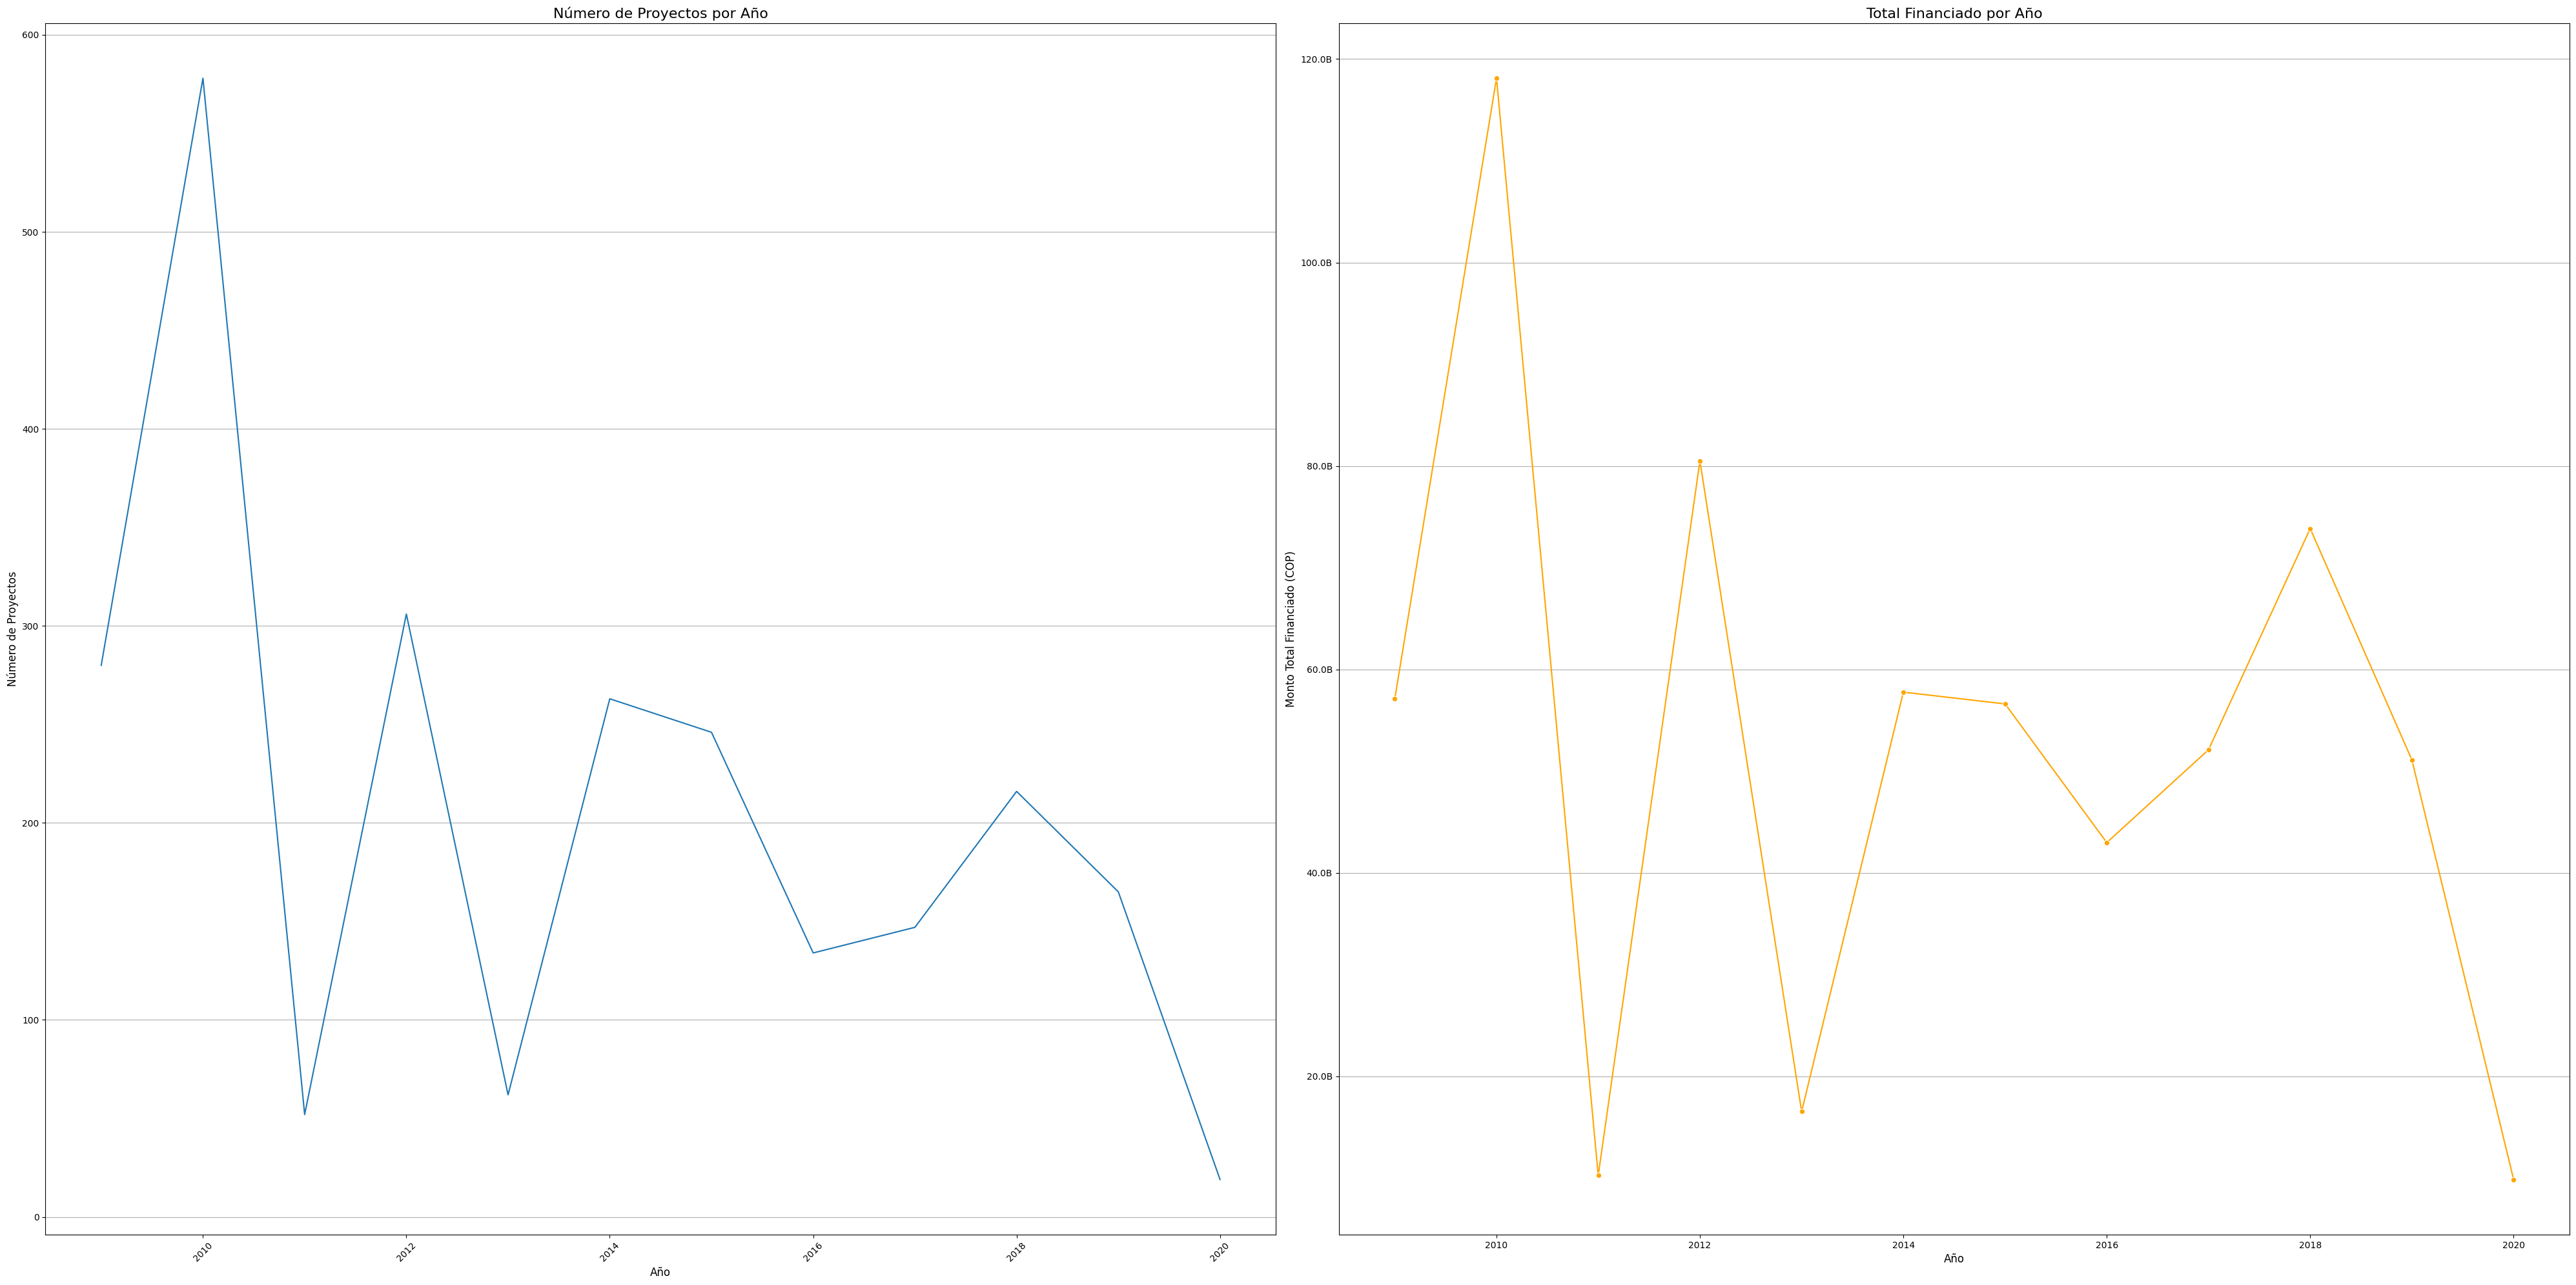

In [205]:
df['FECHA_REGISTRO'] = pd.to_datetime(df['FECHA_REGISTRO'], errors='coerce')
df['ANO_REGISTRO'] = df['FECHA_REGISTRO'].dt.year

temporal_analysis = df.groupby('ANO_REGISTRO').agg(
    total_proyectos=('TITULO_PROYECTO', 'count'),
    total_financiado=('MONTO_FINANCIADO_AP', 'sum')
).reset_index()
plt.figure(figsize=(40, 20))
plt.subplot(1, 2, 1)

sns.lineplot(x='ANO_REGISTRO', y='total_proyectos', data=temporal_analysis, palette='deep')
plt.title('Número de Proyectos por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Proyectos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()

plt.subplot(1, 2, 2)
sns.lineplot(x='ANO_REGISTRO', y='total_financiado', data=temporal_analysis, marker='o', color='orange')

formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f}B')  # Usar 'B' para miles de millones
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total Financiado por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Monto Total Financiado (COP)', fontsize=12)
plt.grid(axis='y')

plt.tight_layout();

In [6]:
temporal_analysis

,ANO_REGISTRO,total_proyectos,total_financiado
0,2009,280,57116488942
1,2010,578,118120310093
2,2011,52,10262606642
3,2012,306,80501441994
4,2013,62,16541332468
5,2014,263,57771990294
6,2015,246,56615308104
7,2016,134,42980900111
8,2017,147,52100945480
9,2018,216,73851590515


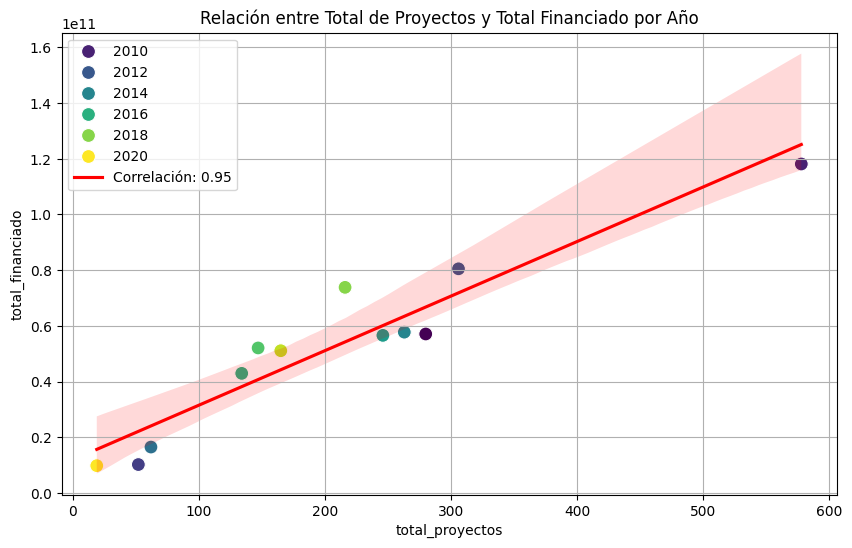

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_proyectos', y='total_financiado', data=temporal_analysis, hue='ANO_REGISTRO', palette='viridis', s=100)
plt.title('Relación entre Total de Proyectos y Total Financiado por Año')
plt.xlabel('Total de Proyectos')
plt.ylabel('Total Financiado')

# Calcular la línea de correlación
correlation = temporal_analysis['total_proyectos'].corr(temporal_analysis['total_financiado'])
sns.regplot(x='total_proyectos', y='total_financiado', data=temporal_analysis, scatter=False, color='red', label=f'Correlación: {correlation:.2f}')


plt.legend()
plt.grid(True);

In [178]:
df['FECHA_APROBACION'] = pd.to_datetime(df['FECHA_APROBACION'])
df['Year'] = df['FECHA_APROBACION'].dt.year
projects_by_year_department = df.groupby(['Year', 'NME_DEPTO_PRY'])['CODIGO_PROYECTO'].count().reset_index()
projects_by_year_department = projects_by_year_department.rename(columns={'CODIGO_PROYECTO': 'Project_Count'})
projects_by_year_department

,Year,NME_DEPTO_PRY,Project_Count
0,2007,ANTIOQUIA,1
1,2008,ANTIOQUIA,1
2,2009,AMAZONAS,2
3,2009,ANTIOQUIA,76
4,2009,ARAUCA,1
...,...,...,...
233,2021,BOLIVAR,1
234,2021,BOYACA,1
235,2021,CORDOBA,1
236,2021,SANTANDER,3


In [179]:
pivot_table = projects_by_year_department.pivot(index='Year', columns='NME_DEPTO_PRY', values='Project_Count')
pivot_table

NME_DEPTO_PRY,AMAZONAS,ANTIOQUIA,ARAUCA,ARCHIPIELAGO DE,ATLANTICO,BOGOTA D.C.,BOLIVAR,BOYACA,CALDAS,CAQUETA,...,NARINO,NORTE DE SANTAN,QUINDIO,RISARALDA,SANTANDER,SUCRE,TOLIMA,VALLE DEL CAUCA,VAUPES,VICHADA
Year,,,,,,,,,,,,,,,,,,,,,
2007,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,2.0,76.0,1.0,NaN,11.0,76.0,8.0,3.0,8.0,2.0,...,2.0,NaN,4.0,2.0,19.0,2.0,5.0,28.0,NaN,NaN
2010,1.0,117.0,NaN,NaN,14.0,174.0,15.0,5.0,13.0,1.0,...,NaN,NaN,5.0,7.0,30.0,2.0,3.0,46.0,NaN,NaN
2011,2.0,21.0,1.0,1.0,2.0,39.0,2.0,2.0,6.0,6.0,...,6.0,2.0,1.0,3.0,9.0,NaN,5.0,18.0,1.0,1.0
2012,1.0,70.0,NaN,NaN,10.0,64.0,11.0,1.0,6.0,NaN,...,2.0,2.0,1.0,9.0,17.0,1.0,1.0,18.0,1.0,NaN
2013,NaN,45.0,NaN,NaN,11.0,48.0,3.0,1.0,4.0,NaN,...,1.0,NaN,3.0,NaN,8.0,NaN,1.0,14.0,NaN,NaN
2014,1.0,64.0,NaN,NaN,11.0,90.0,8.0,4.0,6.0,NaN,...,2.0,2.0,3.0,7.0,21.0,NaN,1.0,25.0,NaN,NaN
2015,NaN,65.0,NaN,NaN,7.0,53.0,6.0,1.0,4.0,NaN,...,3.0,NaN,3.0,2.0,16.0,NaN,NaN,22.0,NaN,NaN


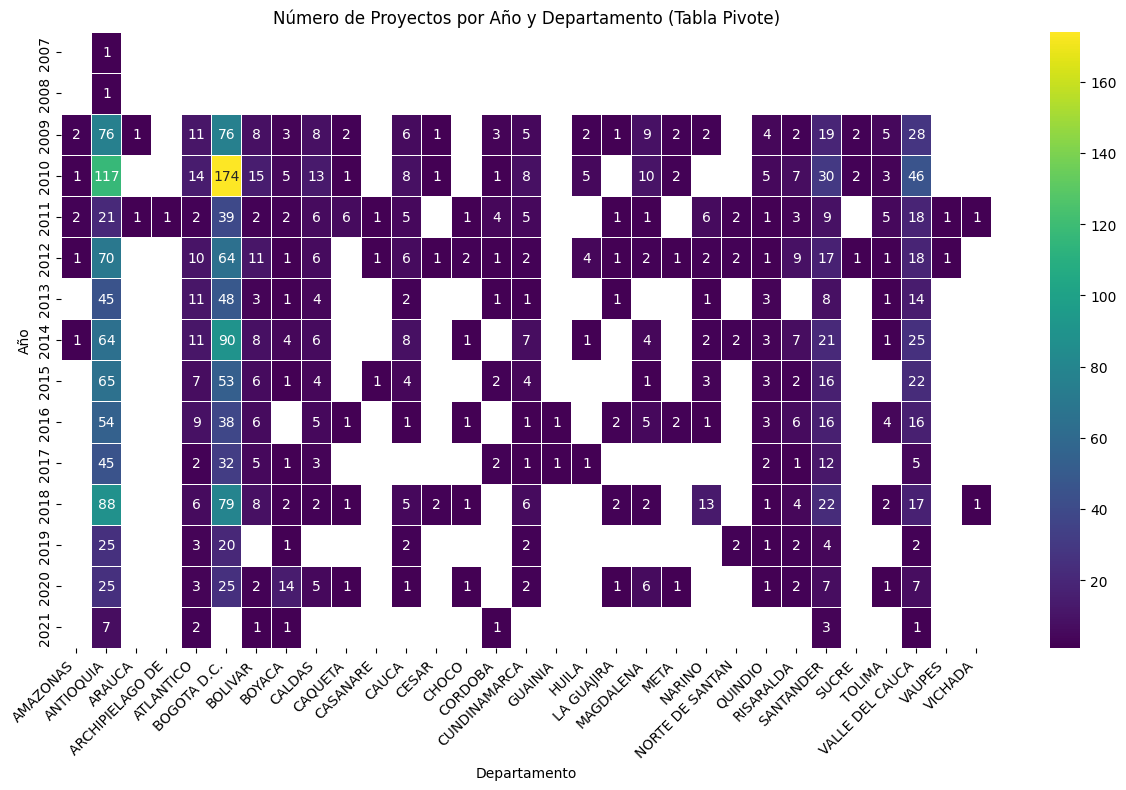

In [180]:

plt.figure(figsize=(15, 8))
# Change the format code to 'g' or '.0f' to handle floats and integers
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
plt.title('Número de Proyectos por Año y Departamento (Tabla Pivote)')
plt.xlabel('Departamento')
plt.ylabel('Año')
plt.xticks(rotation=45, ha='right')
plt.show();

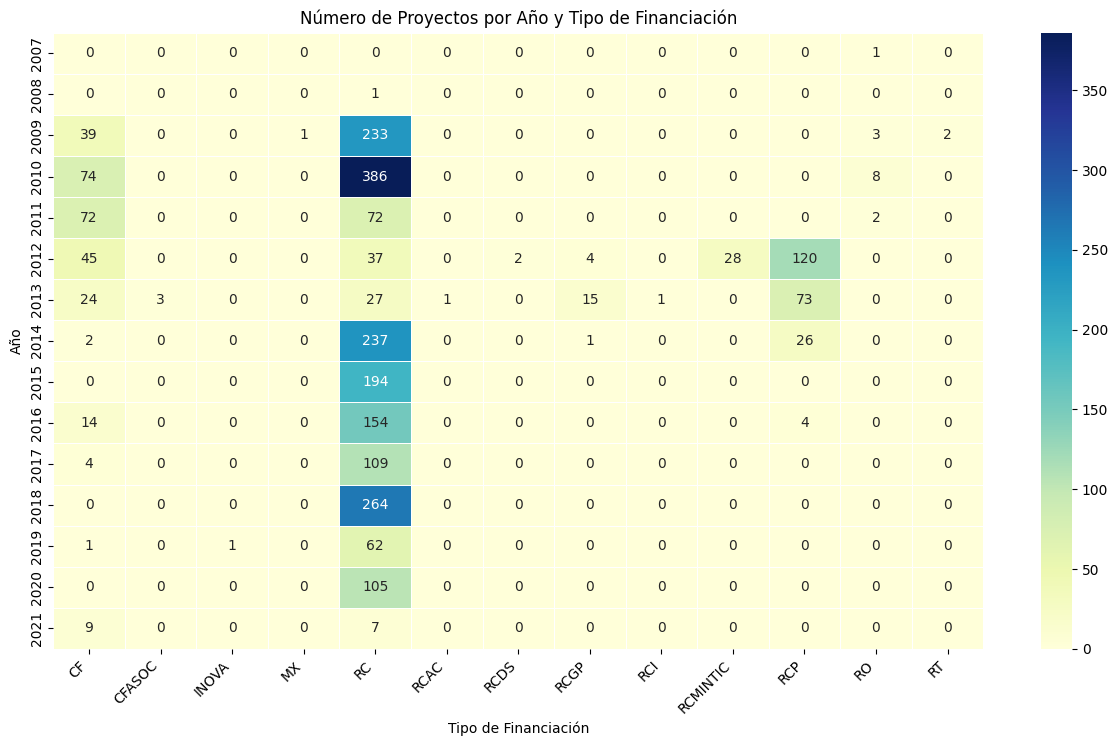

In [181]:
pivot_table_funding = df.pivot_table(index='Year', columns='TIPO_FINANCIACION', values='CODIGO_PROYECTO', aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table_funding, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Número de Proyectos por Año y Tipo de Financiación')
plt.xlabel('Tipo de Financiación')
plt.ylabel('Año')
plt.xticks(rotation=45, ha='right');

In [201]:
# Seleccionar las columnas de interés
data_subset = df[['MONTO_FINANCIADO_AP', 'MONTO_TOTAL_AP']]

# Normalización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

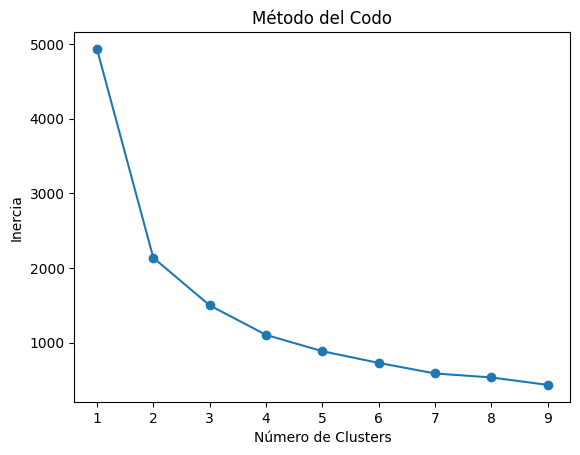

In [202]:
# Determinar el número de clusters utilizando el método del codo
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para encontrar el número óptimo de clusters
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

<ipython-input-204-7b5590af2e94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['cluster'] = kmeans.fit_predict(data_scaled)


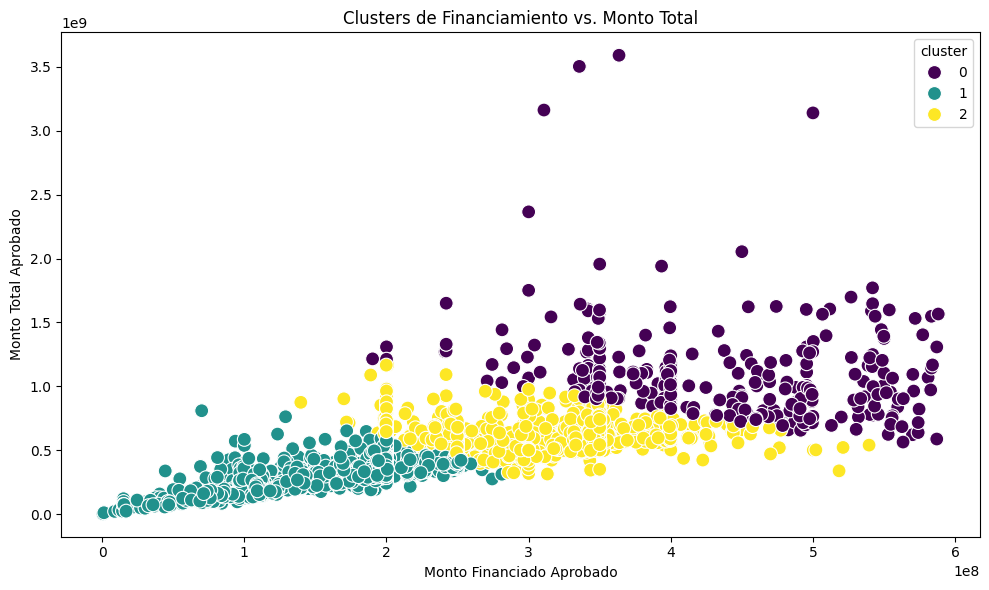

In [204]:
# Realizar el clustering con el número óptimo de clusters (en este caso 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data_subset['cluster'] = kmeans.fit_predict(data_scaled)

# Graficar los resultados del clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MONTO_FINANCIADO_AP', y='MONTO_TOTAL_AP', hue='cluster', data=data_subset, palette='viridis', s=100)
plt.title('Clusters de Financiamiento vs. Monto Total')
plt.xlabel('Monto Financiado Aprobado')
plt.ylabel('Monto Total Aprobado')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

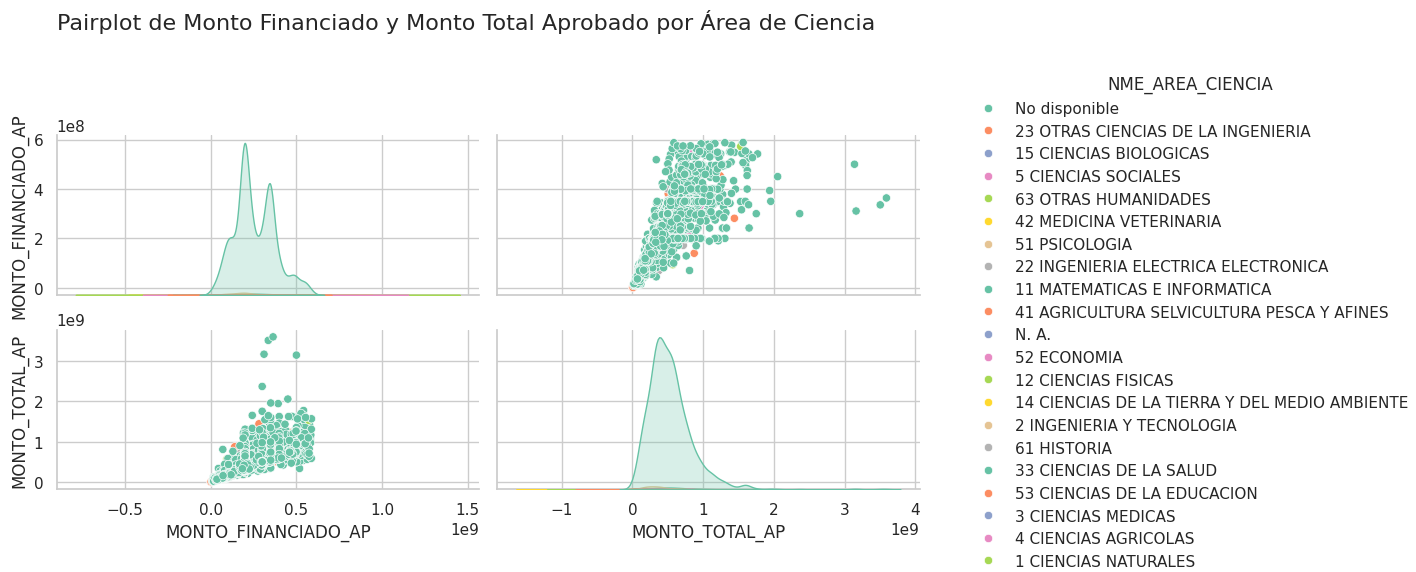

In [239]:
# Selección de un subconjunto de variables para el pairplot

plt.figure(figsize=(12, 8))
data_subset = df[['MONTO_FINANCIADO_AP', 'MONTO_TOTAL_AP', 'NME_DEPTO_PRY', 'NME_AREA_CIENCIA']]

# Crear el pairplot con 'hue' como 'NME_AREA_CIENCIA' para colorear por área de ciencia
pairplot = sns.pairplot(data_subset, kind='scatter', diag_kind='kde', hue='NME_AREA_CIENCIA', palette='Set2')

# Título del gráfico
plt.suptitle('Pairplot de Monto Financiado y Monto Total Aprobado por Área de Ciencia', fontsize=16, y=1.1)

# Ajustar etiquetas en el gráfico
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X
plt.yticks(rotation=45, ha='right')  # Rotar las etiquetas del eje Y

# Espaciar las etiquetas para mayor claridad
plt.tight_layout()  # Ajusta el espacio entre subgráficos y etiquetas

# Mover la leyenda fuera de las gráficas
pairplot._legend.set_bbox_to_anchor((1.5, 0.5))  # Ajustar la ubicación de la leyenda fuera del gráfico

# Mostrar el gráfico
plt.show()